In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
# Load data and normalize
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

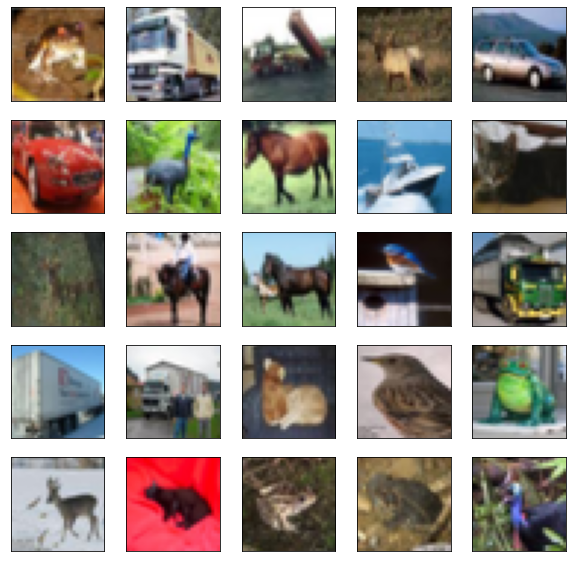

In [3]:
# quick way to choose class names and verify - taken from TensorFlow tutorials

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]], color='white')
plt.show()

In [51]:
# Complete model: 32C2-32C2-Pool-0.2D-64C2-64C2-0.3D-128C2-128C2-0.4D-Flatten-128C1-0.5D-10C1

model = Sequential()
# 32-filter convolutions with 0.2 dropout
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
# 64-filter convolutions with 0.3 dropout
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

#128-filter convolutions with 0.4 dropout
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

#Classification step
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 64)        

In [52]:
history = model.fit(x_train, y_train, epochs=200, validation_data = (x_test, y_test), verbose=0)

10000/10000 [==============================] - 1s 80us/sample - loss: 0.6596 - accuracy: 0.8012


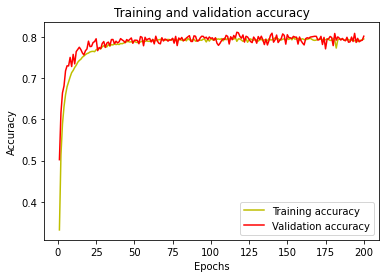

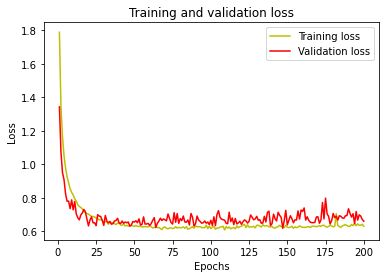

In [53]:
loss, acc = model.evaluate(x_test, y_test)

def plot_accuracy(model, history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(accuracy) + 1)
    plt.plot(epochs, accuracy, 'y', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

def plot_loss_functions(model, history):
    weights = model.layers[0].get_weights()[0]
    biases = model.layers[0].get_weights()[1]

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_accuracy(model, history)
plot_loss_functions(model, history)

# #AtLeastItsNotOverfit